## 2016313844 Jeonghoon Park

### Data clustering on IRIS data

- Experiment clustering classifier with the IRIS data
- While changing the number of the clusters, estimate the proper number of clusters
- Using the cluster numbers, Learn the clustering models and visualize the results of the models.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

iris = load_iris()
iris_frame = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns = iris['feature_names'] + ['target'])
iris_frame['target'] = iris_frame['target'].map({1:"versicolor",0:"setosa",2:"virginica"})
X = iris_frame.iloc[:,:-1]
Y = iris_frame.iloc[:,[-1]]
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


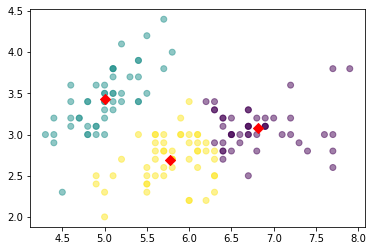

In [2]:
df1 = iris_frame[["sepal length (cm)" , "sepal width (cm)" ]]
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sn

#모델 생성 및 예측
model = KMeans(n_clusters = 3, algorithm='auto')
model.fit(df1)
predict = pd.DataFrame(model.predict(df1))
predict.columns = ['predict']

r = pd.concat([df1,predict],axis=1)
plt.scatter(r["sepal length (cm)"] , 
            r["sepal width (cm)" ], 
            c=r['predict'],
                alpha=0.5)

centers = pd.DataFrame(model.cluster_centers_,
                       columns = ["sepal length (cm)" , "sepal width (cm)" ])

center_x = centers["sepal length (cm)"]
center_y = centers["sepal width (cm)"]
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

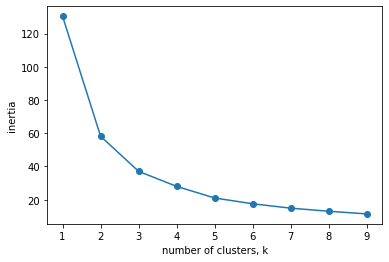

In [3]:
ks = range(1,10)
iner=[]

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df1)
    iner.append(model.inertia_)
plt.plot(ks,iner,'-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### Data clustering on DIGIT data

- Experiment clustering on the scikit-learn's dataset : The DIGIT
- Execute hierarchical clustering with module(scipy.cluster.hierarchy)'s dendogram, linkdage
- Visualize the hierarchical clustering, check the results

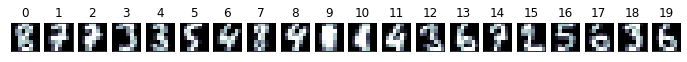

In [4]:
from sklearn.datasets import load_digits

digits=load_digits()
n_image = 20

np.random.seed(0)

idx = np.random.choice(range(len(digits.images)), n_image)
X = digits.data[idx]
images = digits.images[idx]
plt.figure(figsize= (12,1))

for i in range(n_image):
    plt.subplot(1, n_image, i+1)
    plt.imshow(images[i], cmap=plt.cm.bone)
    plt.grid(False)
    plt.xticks(())
    plt.yticks(())
    plt.title(i)

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(X, 'ward')
Z

array([[ 3.        , 18.        , 23.51595203,  2.        ],
       [13.        , 19.        , 25.27844932,  2.        ],
       [ 1.        , 14.        , 28.67054237,  2.        ],
       [17.        , 21.        , 31.04298096,  3.        ],
       [ 4.        ,  7.        , 31.51190251,  2.        ],
       [ 6.        ,  8.        , 32.54228019,  2.        ],
       [ 9.        , 10.        , 33.36165464,  2.        ],
       [ 0.        , 24.        , 34.51086785,  3.        ],
       [ 2.        , 22.        , 37.03151811,  3.        ],
       [11.        , 26.        , 43.25505751,  3.        ],
       [12.        , 15.        , 45.31004304,  2.        ],
       [16.        , 20.        , 45.36151085,  3.        ],
       [ 5.        , 27.        , 53.54437412,  4.        ],
       [30.        , 32.        , 56.6892112 ,  6.        ],
       [25.        , 29.        , 60.16809786,  5.        ],
       [28.        , 34.        , 66.61618922,  8.        ],
       [31.        , 33.

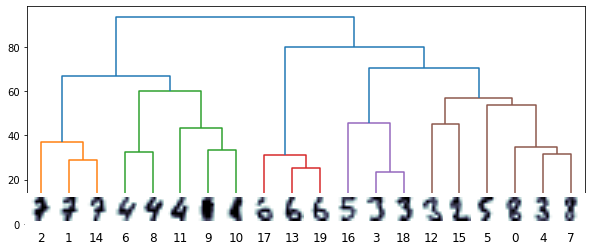

In [6]:
#밑에 import 단에 OffsetImage 중 O,I가 대문자임.

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.figure(figsize=(10,4))
ax = plt.subplot()

ddata = dendrogram(Z)

dcoord = np.array(ddata['dcoord'])
icoord = np.array(ddata['icoord'])
leaves = np.array(ddata['leaves'])

idx = np.argsort(dcoord[:,2])
dcoord = dcoord[idx,:]
icoord = icoord[idx,:]
idx = np.argsort(Z[:,:2].ravel())
label_pos = icoord[:,1:3].ravel()[idx][:20]

for i in range(20):
    imagebox = OffsetImage(images[i], 
                           cmap = plt.cm.bone_r, 
                           interpolation = 'bilinear',
                          zoom = 3)
    ab = AnnotationBbox(imagebox, (label_pos[i],0),
                       box_alignment=(0.5,-0.1),
                       bboxprops = {"edgecolor" : "none"})
    ax.add_artist(ab)
    
plt.show()